In [21]:
# from sklearn import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from math import exp, inf

In [22]:
class ChangePointSequence:
    def __init__(self, N, mean, standard_deviation, change_point_position):
        self.N = N
        self.counter = -1
        self.mean = mean
        self.standard_deviation = standard_deviation
        self.change_point_position = change_point_position
        self.sequence = []
        
    def __iter__(self):
        return self
    
    def __next__(self):
        pass

    
class NoChangePoint(ChangePointSequence):
    '''
    Потоковая генерация случайной последовательности без разладки.
    '''
    def __init__(self, N, mean, standard_deviation):
        super().__init__(N, mean, standard_deviation, 0)
        
    def __next__(self):
        if self.counter < self.N:
            self.counter += 1
            new_element_sequence = float(norm.rvs(loc=self.mean, scale=self.standard_deviation, size=1))             
            self.sequence.append(new_element_sequence)
            return new_element_sequence
        else:
            raise StopIteration
    

class ChagePointMean(ChangePointSequence):
    '''
    Потоковая генерация случайной последовательности с разладкой в М.О.
    '''
    def __init__(self, N, mean, standard_deviation, change_point_position, mean_change):
        super().__init__(N, mean, standard_deviation, change_point_position)
        self.mean_change = mean_change
        
    def __next__(self):
        if self.counter < self.N:
            
            self.counter += 1
            
            new_element_sequence = float(norm.rvs(loc=self.mean, scale=self.standard_deviation, size=1)) \
            if self.counter <= self.change_point_position \
            else float(norm.rvs(loc=(self.mean+self.mean_change), scale=self.standard_deviation, size=1))
            
            self.sequence.append(new_element_sequence)
            return new_element_sequence
        
        else:
            raise StopIteration
            
            
class ChagePointMeanDynamic(ChangePointSequence):
    '''
    Потоковая генерация случайной последовательности с разладкой в М.О.
    '''
    def __init__(self, N, mean, standard_deviation, change_point_position, mean_change):
        super().__init__(N, mean, standard_deviation, change_point_position)
        self.mean_change = mean_change
        
    def __next__(self):
        if self.counter < self.N:
            
            self.counter += 1
            
            new_element_sequence = float(norm.rvs(loc=self.mean, scale=self.standard_deviation, size=1)) \
            if self.counter <= self.change_point_position \
            else float(norm.rvs(loc=(self.mean+self.mean_change*(self.counter-self.change_point_position)),
                                scale=self.standard_deviation,
                                size=1))
            
            self.sequence.append(new_element_sequence)
            return new_element_sequence
            
        else:
            raise StopIteration
            
            
class ChagePointDispersion(ChangePointSequence):
    '''
    Потоковая генерация случайной последовательности с разладкой в дисперсии
    '''
    def __init__(self, N, mean, standard_deviation, change_point_position, standard_deviation_change):
        super().__init__(N, mean, standard_deviation, change_point_position)
        self.standard_deviation_change = standard_deviation_change
        
    def __next__(self):
        if self.counter < self.N:
            
            self.counter += 1
            
            new_element_sequence = float(norm.rvs(loc=self.mean, scale=self.standard_deviation, size=1)) \
            if self.counter <= self.change_point_position \
            else float(norm.rvs(loc=self.mean, scale=(self.standard_deviation+self.standard_deviation_change), size=1))
            
            self.sequence.append(new_element_sequence)
            return new_element_sequence
        
        else:
            raise StopIteration    

In [52]:
sequence = ChagePointMean(N=1000, mean=1, standard_deviation=2, change_point_position=600, mean_change=2)

# Алгоритм Воробейчикова
def z_n(N, m, x, n, n0):
    def sign(x):
        return 1 if x >= 0 else -1

    def y_n(x, n, n0):
        return sign(x[n] - x[n-n0])

    return N * y_n(x, n, n0) - m


def dcp(difference_step_count, difference):
    if len(difference) < difference_step_count:
        return False
    previous = None
    for i in range(difference_step_count-1):
        if difference[-1-i] != difference[-2-i]:
            return False
    return True


n0 = 400
m = 3
N = 5
n = 0
difference_step_count = 15


l = N + m
a = l + 1
Sn = []
x = []
difference = []


while n <= n0:
    x.append(next(sequence))
    Sn.append(l)
    n += 1


for new_value in sequence:
    x.append(new_value)
    zn = z_n(N, m, x, n, n0)
    current_Sn = max(Sn[-1] + zn, l)
    difference.append((current_Sn - Sn[-1]))
    Sn.append(current_Sn)
    if dcp(difference_step_count, difference):
        print('Точка обнаружения разладки:', n, 'Точка разладки:', n - difference_step_count)
        break
    n += 1

Точка обнаружения разладки: 908 Точка разладки: 893


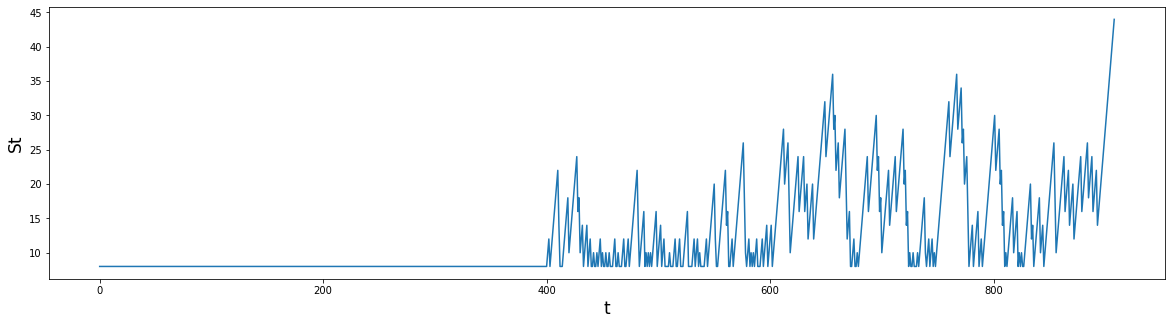

In [53]:
plt.figure(figsize=(20,5))
plt.ylabel('St', fontsize=17)
plt.xlabel('t', fontsize=17)
plt.plot(Sn)
plt.show()

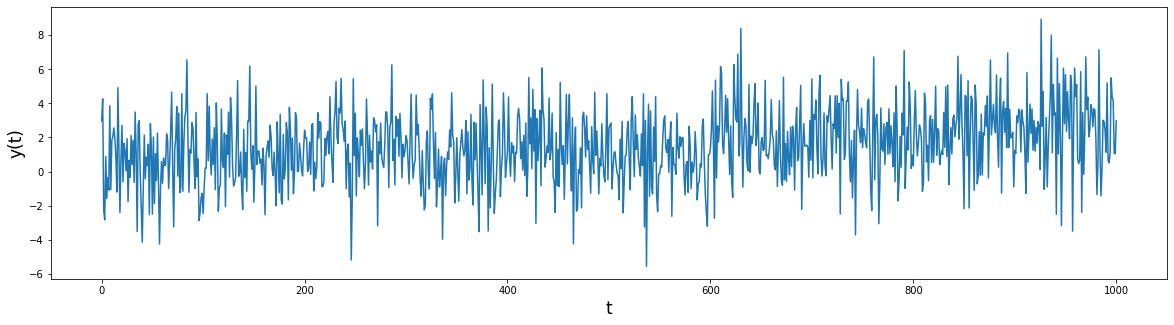

In [45]:
plt.figure(figsize=(20,5))
plt.ylabel('y(t)', fontsize=17)
plt.xlabel('t', fontsize=17)
plt.plot(sequence.sequence)
plt.show()

In [5]:
sequence = ChagePointMean(N=100, mean=0, standard_deviation=1, change_point_position=60, mean_change=5)

# Алгоритм Воробейчикова
def sign(x):
    return 1 if x >= 0 else -1

def y_n(x, n, n0):
    return sign(x[n] - x[n-n0])

n0 = 10
n = 0
m = 1

x = []
sign_lst = []
means = []


while n <= n0:
    x.append(next(sequence))
    sign_lst.append(0)
    means.append(0)
    n += 1


for new_value in sequence:
    x.append(new_value)
    sign_lst.append(y_n(x, n, n0))
    means.append(sum(sign_lst[n:n+n0])/n0)
    n += 1
    m += 1

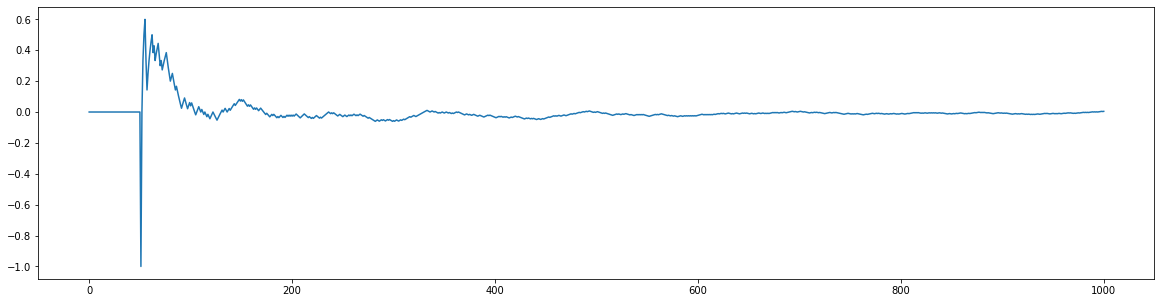

In [40]:
plt.figure(figsize=(20,5))
plt.plot(means)
plt.show()

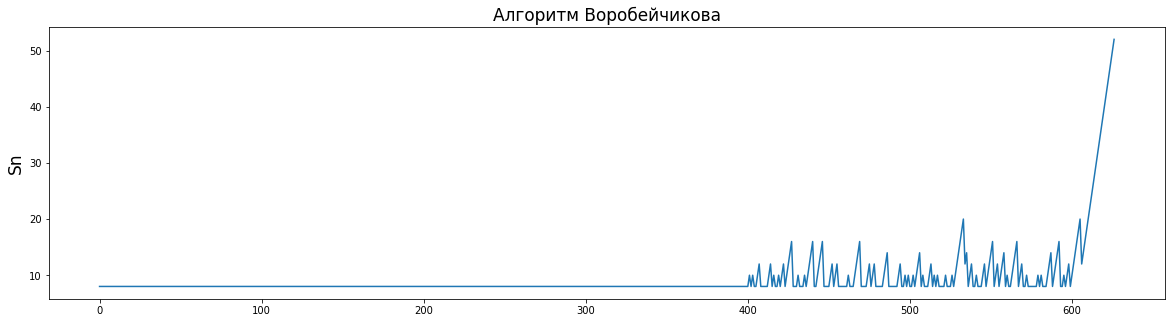

In [41]:
plt.figure(figsize=(20,5))
plt.ylabel('Sn', fontsize=17)
plt.title('Алгоритм Воробейчикова', fontsize=17)
plt.plot(Sn)
plt.show()

# Тесты

In [59]:
CPM_tests = [
    (1,1,2),
    (1,1,3),
    (1,1/2,2),
    (1,2,1),
    (1,2,2),
]

NCP_tests = [
    (0,1),
    (1,2),
    (1,3),
    (1,1/2),
]

# E = 1
CPD_tests = [
    (1,1),
    (1, 1.5)
    (1,2),
    (1,3),
]

# E = 1
CPMD_tests = [
    (1/2,0.1),
    (1,0.1),
    (2,0.1),
    (1/2,0.5),
    (1,0.5),
    (2,0.5),
    (1/2,1),
    (1,1),
    (2,1),
]


print('CPM тесты')
print('____________________________________________________________________________________________')
print()

for test in CPM_tests:
        lst = []
        for i in range(1000):    
            sequence = ChagePointMean(
                N=1000,
                mean=test[0], 
                standard_deviation=test[1], 
                change_point_position=600, 
                mean_change=test[2])

            result, _ = algorithm_change_point_St(seq=sequence, difference_step_count=10)
            lst.append(result)
        
        lst_mean = [x-600 for x in lst if x >= 600]
        lst_freq = [x for x in lst if 0 < x < 600]
        lst_no_detection = [x for x in lst if x < 0]

        average_lag_time = np.mean(lst_mean)
        false_detection_probability = len(lst_freq)/1000
        no_detection_probability = len(lst_no_detection)/1000
        std_time = np.std(lst_mean)

        print('E =', test[0], 'std =', test[1], '∆E = ', test[2])
        print('Среднее время задержки обнаружения =', average_lag_time)
        print('Cреднеквадратичное отклонение задержки обнаружения =', std_time)
        print('Отн. частота ложного обнаружения =', false_detection_probability)
        print('Отн. частота обнаружения отсутствия разладки =', no_detection_probability)
        print()
        
print('____________________________________________________________________________________________')



print('CPD тесты')
print('____________________________________________________________________________________________')
print()

for test in CPD_tests:
        lst = []
        for i in range(1000):    
            sequence = ChagePointDispersion(
                N=1000,
                mean=1, 
                standard_deviation=test[0], 
                change_point_position=600, 
                standard_deviation_change=test[1])

            result, _ = algorithm_change_point_St(seq=sequence, difference_step_count=10)
            lst.append(result)
        
        lst_mean = [x-600 for x in lst if x >= 600]
        lst_freq = [x for x in lst if 0 < x < 600]
        lst_no_detection = [x for x in lst if x < 0]

        average_lag_time = np.mean(lst_mean)
        false_detection_probability = len(lst_freq)/1000
        no_detection_probability = len(lst_no_detection)/1000
        std_time = np.std(lst_mean)

        print('E = 1', 'std =', test[0], '∆std = ', test[1])
        print('Среднее время задержки обнаружения =', average_lag_time)
        print('Cреднеквадратичное отклонение задержки обнаружения =', std_time)
        print('Отн. частота ложного обнаружения =', false_detection_probability)
        print('Отн. частота обнаружения отсутствия разладки =', no_detection_probability)
        print()
        
print('____________________________________________________________________________________________')

print('CPMD тесты')
print('____________________________________________________________________________________________')
print()

for test in CPMD_tests:
        lst = []
        for i in range(1000):    
            sequence = ChagePointMeanDynamic(
                N=1000,
                mean=1, 
                standard_deviation=test[0], 
                change_point_position=600, 
                mean_change=test[1])

            result, _ = algorithm_change_point_St(seq=sequence, difference_step_count=10)
            lst.append(result)
        
        lst_mean = [x-600 for x in lst if x >= 600]
        lst_freq = [x for x in lst if 0 < x < 600]
        lst_no_detection = [x for x in lst if x < 0]

        average_lag_time = np.mean(lst_mean)
        false_detection_probability = len(lst_freq)/1000
        no_detection_probability = len(lst_no_detection)/1000
        std_time = np.std(lst_mean)

        print('E = 1', 'std =', test[0], 'a = ', test[1])
        print('Среднее время задержки обнаружения =', average_lag_time)
        print('Cреднеквадратичное отклонение задержки обнаружения =', std_time)
        print('Отн. частота ложного обнаружения =', false_detection_probability)
        print('Отн. частота обнаружения отсутствия разладки =', no_detection_probability)
        print()
        
print('____________________________________________________________________________________________')

CPD тесты
____________________________________________________________________________________________

E = 1 std = 1 ∆std =  1
Среднее время задержки обнаружения = 182.90575916230367
Cреднеквадратичное отклонение задержки обнаружения = 114.05019340644147
Отн. частота ложного обнаружения = 0.12
Отн. частота обнаружения отсутствия разладки = 0.689

E = 1 std = 1 ∆std =  1.5
Среднее время задержки обнаружения = 202.14438502673798
Cреднеквадратичное отклонение задержки обнаружения = 122.51484907501272
Отн. частота ложного обнаружения = 0.107
Отн. частота обнаружения отсутствия разладки = 0.706



KeyboardInterrupt: 

In [77]:
CPM_tests = [
    (1,1,2), 
    (1,1,3),
    (1,1/2,2),
    (1,2,1),
    (1,2,2),
]

NCP_tests = [
    (0,1),
    (1,2),
    (1,3),
    (1,1/2),
]

# E = 1
CPD_tests = [
    (1,1),
    (1,1.5),
    (1,2),
    (1,3),
]

# E = 1
CPMD_tests = [
    (1/2,0.1),
    (1,0.1),
    (2,0.1),
    (1/2,0.5),
    (1,0.5),
    (2,0.5),
    (1/2,1),
    (1,1),
    (2,1),
]

k1 = 5
k2 = 10
k3 = 15
k4 = 20

def calculate_W(k, change_point_list, N=1000, CP=600):
    left = CP
    right = CP + k
    lst_freq = [x for x in change_point_list if left <= x <= right]
    return len(lst_freq) / N


print('CPM тесты')
print('____________________________________________________________________________________________')
print()
for test in CPM_tests:
        
        lst = []
        for i in range(1000):    
            sequence = ChagePointMean(
                N=1000,
                mean=test[0], 
                standard_deviation=test[1], 
                change_point_position=600, 
                mean_change=test[2])

            result, _ = algorithm_change_point_St(seq=sequence, difference_step_count=10)
            lst.append(result)
        
        W_1 = calculate_W(k1, lst)
        W_2 = calculate_W(k2, lst)
        W_3 = calculate_W(k3, lst)
        W_4 = calculate_W(k4, lst)

        print('E =', test[0], 'std =', test[1], '∆E = ', test[2])
        print('W(k1) =', W_1)
        print('W(k2) =', W_2)
        print('W(k3) =', W_3)
        print('W(k4) =', W_4)
        print()
print('____________________________________________________________________________________________')



print('CPD тесты')
print('____________________________________________________________________________________________')
print()

for test in CPD_tests:
        
        lst = []
        for i in range(1000):    
            sequence = ChagePointDispersion(
                N=1000,
                mean=1, 
                standard_deviation=test[0], 
                change_point_position=600, 
                standard_deviation_change=test[1])

            result, _ = algorithm_change_point_St(seq=sequence, difference_step_count=10)
            lst.append(result)
        
        W_1 = calculate_W(k1, lst)
        W_2 = calculate_W(k2, lst)
        W_3 = calculate_W(k3, lst)
        W_4 = calculate_W(k4, lst)

        print('E = 1', 'std =', test[0], '∆std = ', test[1])
        print('W(k1) =', W_1)
        print('W(k2) =', W_2)
        print('W(k3) =', W_3)
        print('W(k4) =', W_4)
        print()
print('____________________________________________________________________________________________')

print('CPMD тесты')
print('____________________________________________________________________________________________')
print()
for test in CPMD_tests:
        
        lst = []
        for i in range(1000):    
            sequence = ChagePointMeanDynamic(
                N=1000,
                mean=1, 
                standard_deviation=test[0], 
                change_point_position=600, 
                mean_change=test[1])

            result, _ = algorithm_change_point_St(seq=sequence, difference_step_count=10)
            lst.append(result)
        
        W_1 = calculate_W(k1, lst)
        W_2 = calculate_W(k2, lst)
        W_3 = calculate_W(k3, lst)
        W_4 = calculate_W(k4, lst)

        print('E = 1', 'std =', test[0], 'a = ', test[1])
        print('W(k1) =', W_1)
        print('W(k2) =', W_2)
        print('W(k3) =', W_3)
        print('W(k4) =', W_4)
        print()
print('____________________________________________________________________________________________')

CPM тесты
____________________________________________________________________________________________

E = 1 std = 1 ∆E =  2
W(k1) = 0.018
W(k2) = 0.428
W(k3) = 0.581
W(k4) = 0.716

E = 1 std = 1 ∆E =  3
W(k1) = 0.029
W(k2) = 0.762
W(k3) = 0.835
W(k4) = 0.893

E = 1 std = 0.5 ∆E =  2
W(k1) = 0.029
W(k2) = 0.882
W(k3) = 0.893
W(k4) = 0.897

E = 1 std = 2 ∆E =  1
W(k1) = 0.003
W(k2) = 0.019
W(k3) = 0.033
W(k4) = 0.048

E = 1 std = 2 ∆E =  2
W(k1) = 0.005
W(k2) = 0.08
W(k3) = 0.152
W(k4) = 0.201

____________________________________________________________________________________________
CPD тесты
____________________________________________________________________________________________

E = 1 std = 1 ∆std =  1
W(k1) = 0.0
W(k2) = 0.003
W(k3) = 0.007
W(k4) = 0.01

E = 1 std = 1 ∆std =  1.5
W(k1) = 0.005
W(k2) = 0.006
W(k3) = 0.011
W(k4) = 0.016

E = 1 std = 1 ∆std =  2
W(k1) = 0.001
W(k2) = 0.003
W(k3) = 0.007
W(k4) = 0.011

E = 1 std = 1 ∆std =  3
W(k1) = 0.003
W(k2) = 0.005
W(k3) = 0

Wотс = 0.709


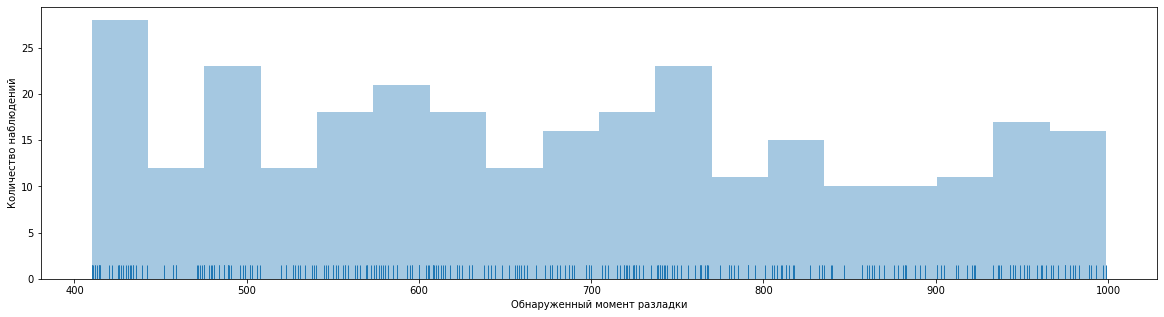

In [70]:
import seaborn as sns

cp_lst = []
for i in range(1000):    
    
    sequence = NoChangePoint(
        N=1000,
        mean=1, 
        standard_deviation=1)
    
    result, _ = algorithm_change_point_St(seq=sequence, difference_step_count=10)
    cp_lst.append(result)

cp = [x for x in cp_lst if x > 0]
print('Wотс =', (1000-len(cp))/1000)
plt.figure(figsize=(20,5))
plt.ylabel('Количество наблюдений')
plt.xlabel('Обнаруженный момент разладки')
sns.distplot(cp, kde=False, rug=True, bins=18)

Wотс = 0.682


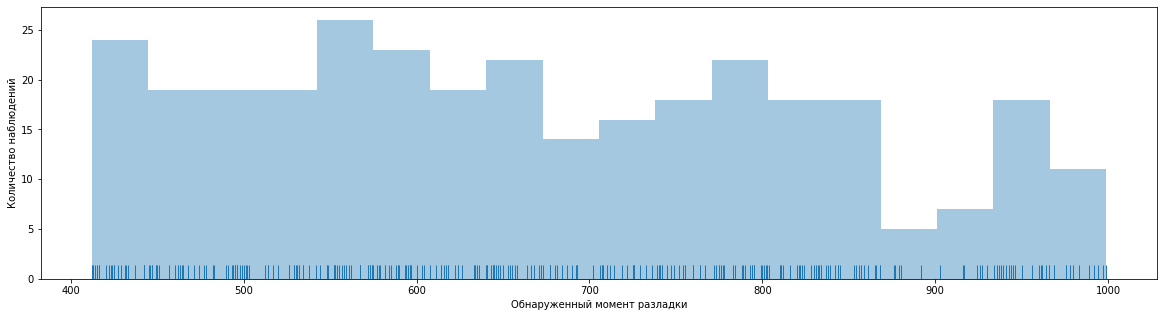

In [71]:
cp_lst = []
for i in range(1000):    
    
    sequence = NoChangePoint(
        N=1000,
        mean=1, 
        standard_deviation=1.5)
    
    result, _ = algorithm_change_point_St(seq=sequence, difference_step_count=10)
    cp_lst.append(result)

cp = [x for x in cp_lst if x > 0]
print('Wотс =', (1000-len(cp))/1000)
plt.figure(figsize=(20,5))
plt.ylabel('Количество наблюдений')
plt.xlabel('Обнаруженный момент разладки')
sns.distplot(cp, kde=False, rug=True, bins=18)

Wотс = 0.697


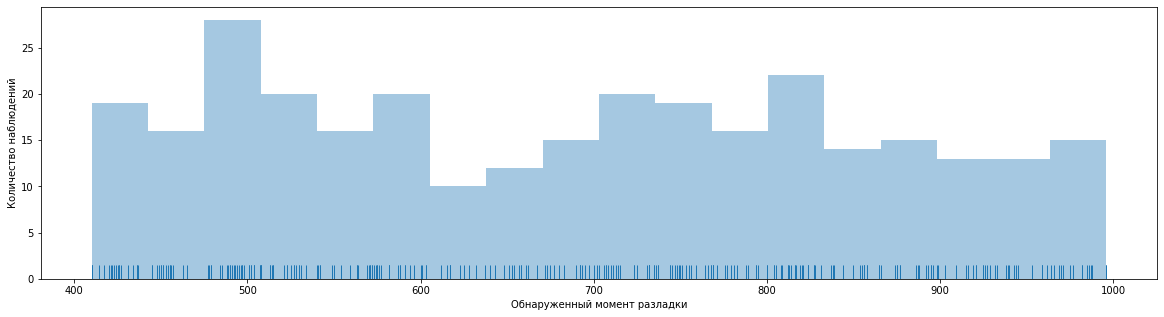

In [72]:
cp_lst = []
for i in range(1000):    
    
    sequence = NoChangePoint(
        N=1000,
        mean=1, 
        standard_deviation=2)
    
    result, _ = algorithm_change_point_St(seq=sequence, difference_step_count=10)
    cp_lst.append(result)

cp = [x for x in cp_lst if x > 0]
print('Wотс =', (1000-len(cp))/1000)
plt.figure(figsize=(20,5))
plt.ylabel('Количество наблюдений')
plt.xlabel('Обнаруженный момент разладки')
sns.distplot(cp, kde=False, rug=True, bins=18)

Wотс = 0.71


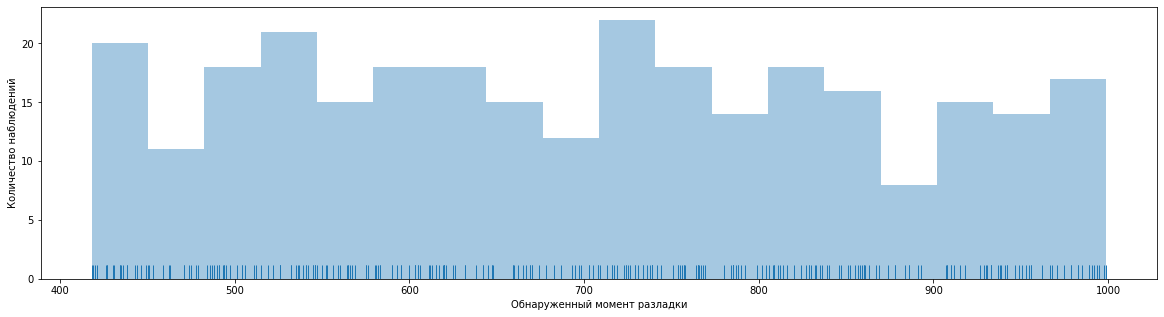

In [73]:
cp_lst = []
for i in range(1000):    
    
    sequence = NoChangePoint(
        N=1000,
        mean=1, 
        standard_deviation=2.5)
    
    result, _ = algorithm_change_point_St(seq=sequence, difference_step_count=10)
    cp_lst.append(result)

cp = [x for x in cp_lst if x > 0]
print('Wотс =', (1000-len(cp))/1000)
plt.figure(figsize=(20,5))
plt.ylabel('Количество наблюдений')
plt.xlabel('Обнаруженный момент разладки')
sns.distplot(cp, kde=False, rug=True, bins=18)

Wотс = 0.717


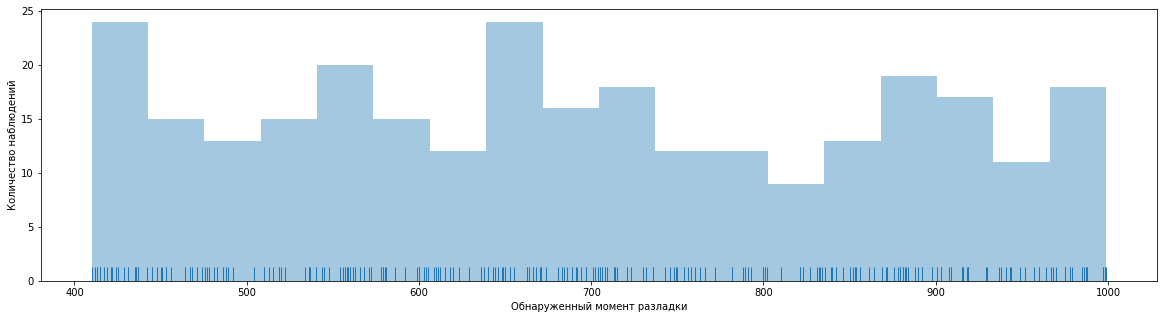

In [74]:
cp_lst = []
for i in range(1000):    
    
    sequence = NoChangePoint(
        N=1000,
        mean=1, 
        standard_deviation=3)
    
    result, _ = algorithm_change_point_St(seq=sequence, difference_step_count=10)
    cp_lst.append(result)

cp = [x for x in cp_lst if x > 0]
print('Wотс =', (1000-len(cp))/1000)
plt.figure(figsize=(20,5))
plt.ylabel('Количество наблюдений')
plt.xlabel('Обнаруженный момент разладки')
sns.distplot(cp, kde=False, rug=True, bins=18)

# Рабочий вариант алгоритма

In [76]:
# Алгоритм Воробейчикова

def algorithm_change_point_St(seq, difference_step_count, t0=300, m=1, N=8):

    def z_n(N, m, x, t, t0):
        def sign(x):
            return 1 if x >= 0 else -1

        def y_n(x, t, t0):
            return sign(x[t] - x[t-t0])

        return N * y_n(x, t, t0) - m
    
    def dcp(difference_step_count, difference):
        if len(difference) < difference_step_count:
            return False
        previous = None
        for i in range(difference_step_count-1):
            if difference[-1-i] != difference[-2-i]:
                return False
        return True
    
    
    l = N + m
    Sn = []
    t = 0
    x = []
    difference = []
    
    while t <= t0:
        x.append(next(sequence))
        Sn.append(l)
        t += 1

    for new_value in sequence:
        x.append(new_value)
        zn = z_n(N, m, x, t, t0)
        current_Sn = max(Sn[-1] + zn, l)
        difference.append((current_Sn - Sn[-1]))
        if dcp(difference_step_count, difference):
            return (t, t - difference_step_count)

        Sn.append(current_Sn)
        t += 1
        
    return (-1, -1)
        
        
for i in range(30):    
    sequence = ChagePointMean(N=1000, mean=1, standard_deviation=1, change_point_position=600, mean_change=4)
    a,b = algorithm_change_point_St(seq=sequence, difference_step_count=10)
    print('Точка обнаружения разладки:', a, 'Точка разладки:', b)

Точка обнаружения разладки: 610 Точка разладки: 600
Точка обнаружения разладки: 412 Точка разладки: 402
Точка обнаружения разладки: 610 Точка разладки: 600
Точка обнаружения разладки: 610 Точка разладки: 600
Точка обнаружения разладки: 610 Точка разладки: 600
Точка обнаружения разладки: 610 Точка разладки: 600
Точка обнаружения разладки: 608 Точка разладки: 598
Точка обнаружения разладки: 610 Точка разладки: 600
Точка обнаружения разладки: 608 Точка разладки: 598
Точка обнаружения разладки: 609 Точка разладки: 599
Точка обнаружения разладки: 610 Точка разладки: 600
Точка обнаружения разладки: 571 Точка разладки: 561
Точка обнаружения разладки: 608 Точка разладки: 598
Точка обнаружения разладки: 608 Точка разладки: 598
Точка обнаружения разладки: 506 Точка разладки: 496
Точка обнаружения разладки: 605 Точка разладки: 595
Точка обнаружения разладки: 610 Точка разладки: 600
Точка обнаружения разладки: 419 Точка разладки: 409
Точка обнаружения разладки: 608 Точка разладки: 598
Точка обнару